### Semana 4 - Actividad 1
### Reducción de características de un conjunto de datos para encontrar sus componentes principales y mejorar su interpretabilidad con la menor pérdida de información posible.

Lázaro Lara Martínez.
Matricula A01793198

José Mtanous Treviño.
Matricula A00169781

Ciencia y Analítica de datos.

Profesor Titular.
Jobish Vallikavungal Devassia

Profesor Tutor.
Mtro. Mario Alberto Solano Saldaña

10/Octubre/2022

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [24]:
data_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(data_url)
columns = df.columns
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [25]:
# La columna ID la podemos remover ya que no es una dimensión
df = df.drop(['ID'],axis=1)

# Revisamos los datos para ver si hay algún data faltante
df.isnull().sum()
# hay varios datos faltantes, ya que el número de renglones con datos faltantes son pocos en proporción
# los podemos eliminar de nuestro juego de datos.
x = df.dropna()

# Una vez limpio nuestro data set podemos revisar algunas de sus propiedades estadísticas
x.describe(include="all")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
# Para continuar con nuestro análisis, debemos normalizar los datos
# para esto usaremos una librería de sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaledData = scaler.transform(x)



In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
pca.fit(scaledData)

PCA(n_components=24)

In [28]:
x_pca = pca.transform(scaledData)


In [29]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.559777,0.273010,0.273010
1,2.049717,0.175050,0.448060
2,1.246196,0.064706,0.512766
3,1.214423,0.061449,0.574215
4,1.020248,0.043370,0.617585
5,0.986956,0.040585,0.658170
6,0.956944,0.038155,0.696325
7,0.952515,0.037802,0.734127
8,0.941475,0.036931,0.771058
9,0.933451,0.036304,0.807363


Text(0, 0.5, 'Segundo componente principal')

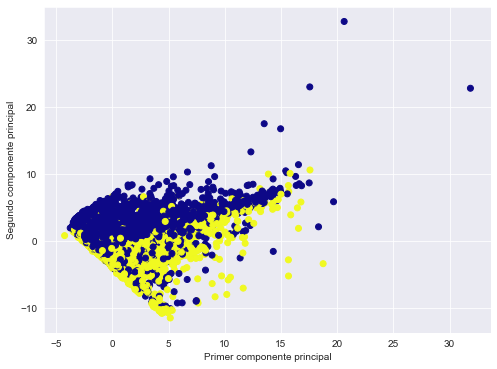

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=x['Y'],cmap='plasma')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')

In [31]:
data_url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df = pd.read_csv(data_url)
columns = df.columns
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [32]:
# La columna ID la podemos remover ya que no es una dimensión
df = df.drop(['ID'],axis=1)

# Revisamos los datos para ver si hay algún data faltante
df.isnull().sum()
# hay varios datos faltantes, ya que el número de renglones con datos faltantes son pocos en proporción
# los podemos eliminar de nuestro juego de datos.
x = df.dropna()

# Una vez limpio nuestro data set podemos revisar algunas de sus propiedades estadísticas
x.describe(include="all")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [33]:
# Para continuear con nuestro análisis, debemos normalizar los datos 
# para esto usaremos una librería de sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaledData = scaler.transform(x)



In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=24)
pca.fit(scaledData)

PCA(n_components=24)

In [35]:
x_pca = pca.transform(scaledData)


In [54]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary


,Standard deviation,Proportion of variance,Cumulative proportion
0,2.559777,0.273010,0.273010
1,2.049717,0.175050,0.448060
2,1.246196,0.064706,0.512766
3,1.214423,0.061449,0.574215
4,1.020248,0.043370,0.617585
5,0.986956,0.040585,0.658170
6,0.956944,0.038155,0.696325
7,0.952515,0.037802,0.734127
8,0.941475,0.036931,0.771058
9,0.933451,0.036304,0.807363


In [55]:
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
Standard deviation,2.5598,2.0497,1.2462,1.2144,1.0202,0.9870,0.9569,0.9525,0.9415,0.9335,...,0.7243,0.6308,0.5094,0.4989,0.4345,0.3632,0.2648,0.2019,0.1590,0.1524
Proportion of variance,0.2730,0.1750,0.0647,0.0614,0.0434,0.0406,0.0382,0.0378,0.0369,0.0363,...,0.0219,0.0166,0.0108,0.0104,0.0079,0.0055,0.0029,0.0017,0.0011,0.0010
Cumulative proportion,0.2730,0.4481,0.5128,0.5742,0.6176,0.6582,0.6963,0.7341,0.7711,0.8074,...,0.9422,0.9588,0.9696,0.9800,0.9879,0.9934,0.9963,0.9980,0.9990,1.0000


Text(0, 0.5, 'Segundo componente principal')

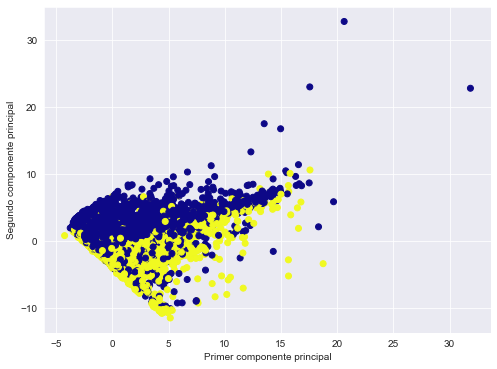

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=x['Y'],cmap='plasma')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')

In [41]:
pca.components_

array([[ 6.55980171e-02, -2.19851412e-02,  1.98233129e-02,
        -5.57463750e-03,  1.40040837e-02,  1.64629521e-01,
         1.97347974e-01,  2.03364808e-01,  2.10039426e-01,
         2.13733802e-01,  2.08879595e-01,  3.32710782e-01,
         3.44111102e-01,  3.48044086e-01,  3.52167734e-01,
         3.50071727e-01,  3.42868639e-01,  9.26280332e-02,
         7.72882103e-02,  8.49277328e-02,  7.64205042e-02,
         7.39917480e-02,  6.86737027e-02,  3.98214438e-02],
       [ 3.11653865e-01,  3.04570365e-02, -8.84857339e-02,
        -3.94422613e-02,  6.27597172e-02, -2.96725579e-01,
        -3.27992163e-01, -3.34896602e-01, -3.34391441e-01,
        -3.21173278e-01, -2.95759083e-01,  1.43598137e-01,
         1.44098606e-01,  1.49966292e-01,  1.49164849e-01,
         1.47337512e-01,  1.45287247e-01,  1.48749834e-01,
         1.38704132e-01,  1.49933953e-01,  1.39982718e-01,
         1.35753707e-01,  1.28126313e-01, -1.76545485e-01],
       [ 1.00284702e-02,  2.80714042e-02, -3.17658872e

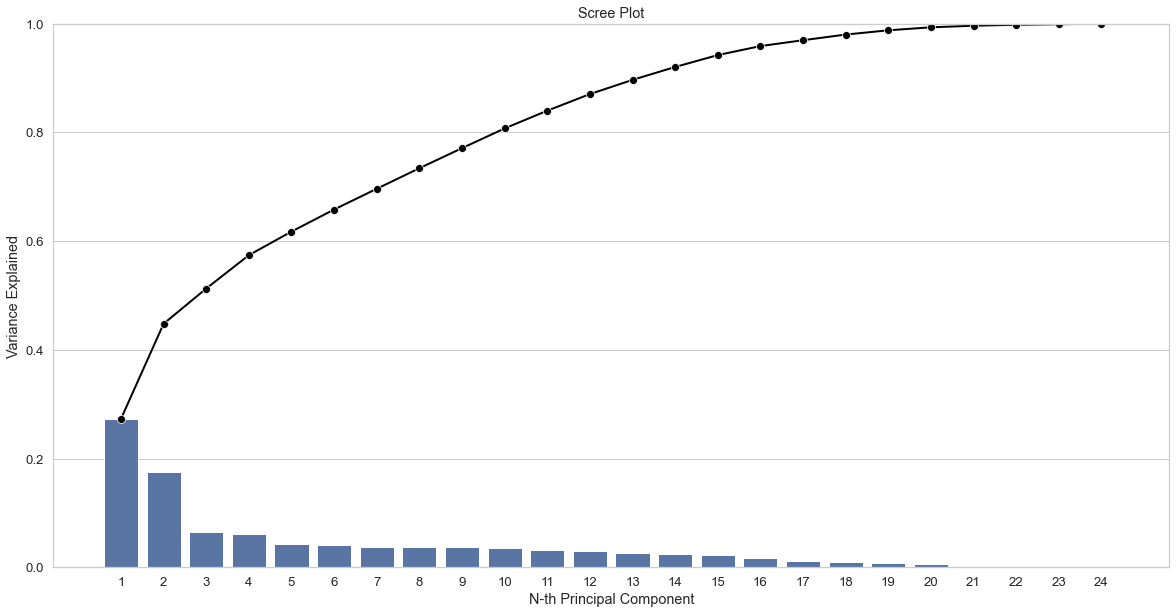

In [61]:
PC_components = np.arange(pca.n_components_) + 1
#PC_components

_ = sb.set(style = 'whitegrid',
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(20, 10))

_ = sb.barplot(x = PC_components,
                y = pca.explained_variance_ratio_,
                color = 'b'
                )

_ = sb.lineplot(x = PC_components-1,
                 y = np.cumsum(pca.explained_variance_ratio_),
                 color = 'black',
                 linestyle = '-',
                 linewidth = 2,
                 marker = 'o',
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

In [67]:
pcsSummary.iloc[:,:8]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Standard deviation,2.559777,2.049717,1.246196,1.214423,1.020248,0.986956,0.956944,0.952515,0.941475,0.933451,0.884852,0.855766
Proportion of variance,0.273010,0.175050,0.064706,0.061449,0.043370,0.040585,0.038155,0.037802,0.036931,0.036304,0.032622,0.030513
Cumulative proportion,0.273010,0.448060,0.512766,0.574215,0.617585,0.658170,0.696325,0.734127,0.771058,0.807363,0.839985,0.870498


In [71]:
for pc in pcsSummary.iloc[:,:8]:
  print('Top 3 variables con mayores coeficientes en magnitud de: ' + pc)
  indexes_abs = pcsSummary[pc].abs().nlargest(3).index
  individual_pc = pcsSummary[pc]
  print(individual_pc[indexes_abs])

Top 3 variables con mayores coeficientes en magnitud de: PC1
Standard deviation        2.559777
Proportion of variance    0.273010
Cumulative proportion     0.273010
Name: PC1, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC2
Standard deviation        2.049717
Cumulative proportion     0.448060
Proportion of variance    0.175050
Name: PC2, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC3
Standard deviation        1.246196
Cumulative proportion     0.512766
Proportion of variance    0.064706
Name: PC3, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC4
Standard deviation        1.214423
Cumulative proportion     0.574215
Proportion of variance    0.061449
Name: PC4, dtype: float64
Top 3 variables con mayores coeficientes en magnitud de: PC5
Standard deviation        1.020248
Cumulative proportion     0.617585
Proportion of variance    0.043370
Name: PC5, dtype: float64
Top 3 variables con mayores coeficientes

In [73]:
pca.explained_variance_.round(3)

array([6.552, 4.201, 1.553, 1.475, 1.041, 0.974, 0.916, 0.907, 0.886,
       0.871, 0.783, 0.732, 0.628, 0.57 , 0.525, 0.398, 0.26 , 0.249,
       0.189, 0.132, 0.07 , 0.041, 0.025, 0.023])

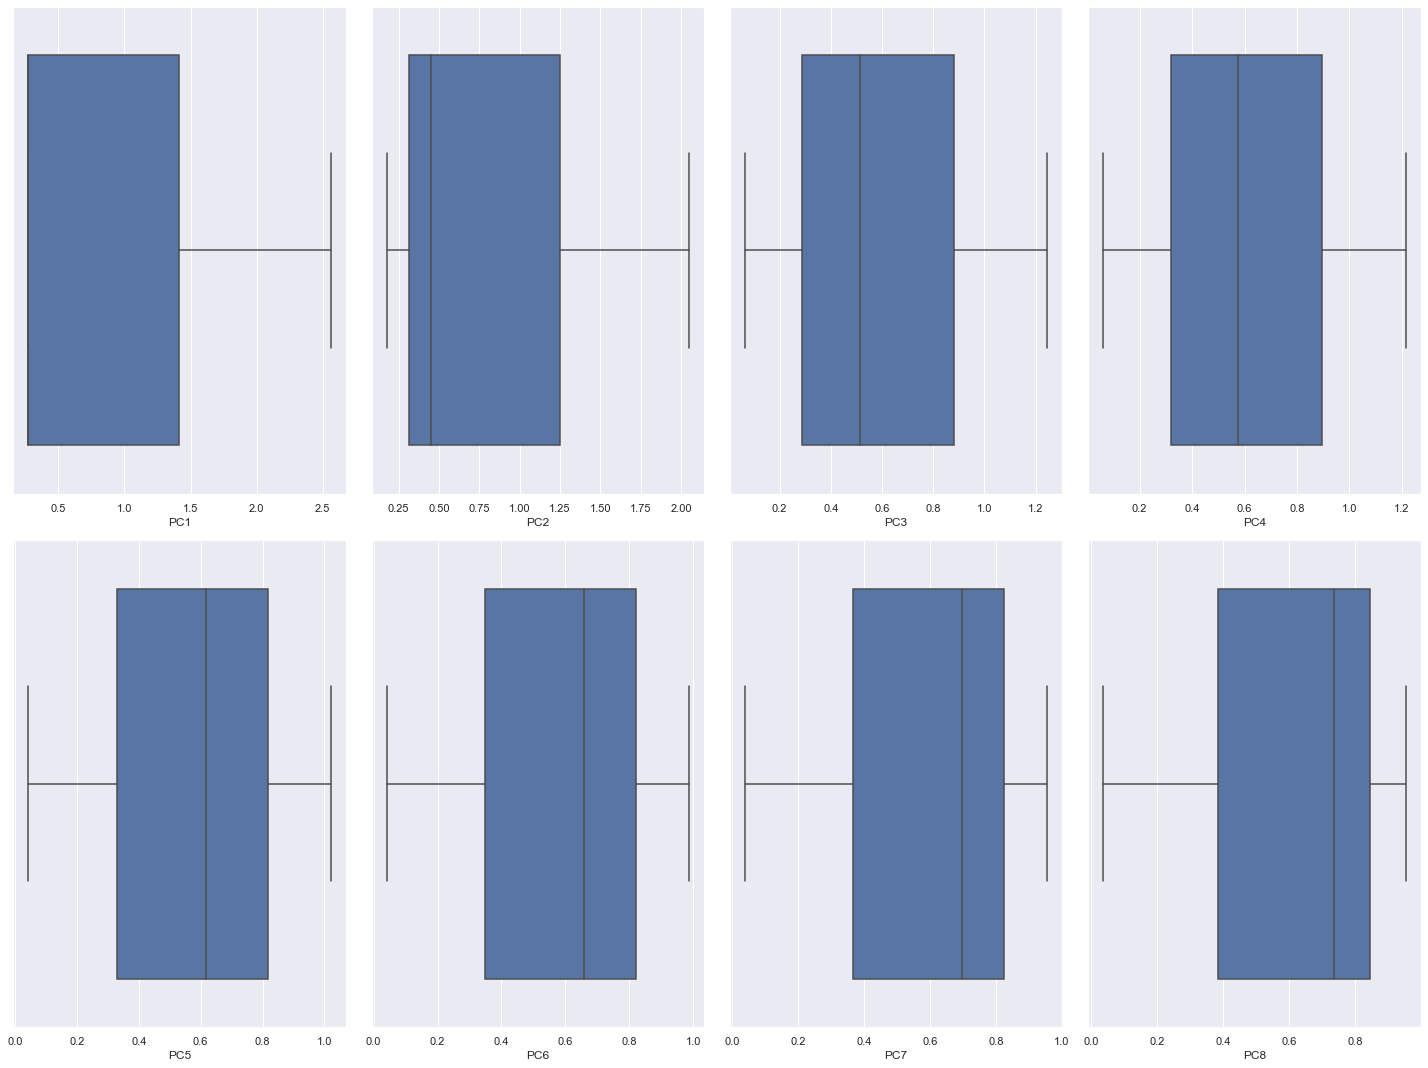

In [72]:
sb.set(rc={'figure.figsize':(20,15)})
fig, ax =plt.subplots(2,4)
j = 0
k = 0
for pc in pcsSummary.iloc[:,:8]:
  sb.boxplot(x=pcsSummary[pc],ax=ax[k,j])
  j = j + 1
  if j > 3:
    k = k + 1
    j = 0
plt.tight_layout()